# Experiment 3: HandDigit Recognition using Artificial Neural Network

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense as layer

In [26]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

from sklearn.model_selection import train_test_split as tts

In [27]:
df = pd.read_csv("X:/Datasets/mnist.csv")

In [28]:
df.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [30]:
x.head(3)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y.head(3)

0    7
1    2
2    1
Name: label, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = tts(x,y, test_size=0.2)

In [33]:
x_train.shape

(8000, 784)

In [34]:
x_train /= 255.0
x_test /= 255.0

In [35]:
ann = Sequential()

In [36]:
ann.add(layer(75, activation ='relu'))
ann.add(layer(50, activation = 'relu'))
ann.add(layer(25, activation = 'relu'))
ann.add(layer(10, activation = 'sigmoid'))

In [37]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', \
            metrics=['accuracy'])

In [38]:
ann.fit(x_train,y_train,epochs = 9, verbose=False)

In [39]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (32, 75)                  58875     
                                                                 
 dense_5 (Dense)             (32, 50)                  3800      
                                                                 
 dense_6 (Dense)             (32, 25)                  1275      
                                                                 
 dense_7 (Dense)             (32, 10)                  260       
                                                                 
Total params: 64,210
Trainable params: 64,210
Non-trainable params: 0
_________________________________________________________________


In [40]:
ann.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.2075 - accuracy: 0.9455


[0.20750711858272552, 0.9455000162124634]

In [41]:
y_predicted = ann.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [42]:
np.argmax(y_predicted[0])

1

In [43]:
np.argmax(y_predicted[7])

7

In [44]:
np.argmax(y_predicted[2])

7

In [45]:
y_predicted_=[np.argmax(i) for i in y_predicted]
y_predicted_[:5]

[1, 5, 7, 9, 1]

In [46]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_)

<AxesSubplot: >

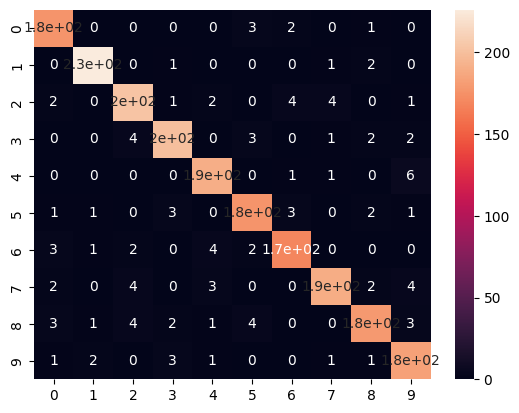

In [50]:
import seaborn as sns
sns.heatmap(cm, annot=True)